In [3]:
import os 
import time 
import uuid
import cv2

In [2]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [7]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting images {}'.format(imgnum))
    ret,frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname,frame)
    cv2.imshow('frame',frame)
    time.sleep(0.5)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

In [2]:
!labelme

External WM_DESTROY received for  QWidgetWindow(0x261454640a0, name="LabelDialogClassWindow") , parent:  QWindow(0x0) , transient parent:  QWidgetWindow(0x26144ea4d50, name="MainWindowClassWindow")


In [4]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [14]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')


InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: data\\images\\*.jpg'

In [30]:
images.as_numpy_iterator().next()


b'data\\images\\aaf2f9de-d9b1-11ed-a913-d88083d593af.jpg'

In [12]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [13]:
images = images.map(load_image)


NameError: name 'images' is not defined

In [33]:
images.as_numpy_iterator().next()


array([[[252, 254, 253],
        [252, 254, 253],
        [252, 254, 253],
        ...,
        [252, 254, 253],
        [252, 254, 253],
        [252, 254, 253]],

       [[252, 254, 253],
        [252, 254, 253],
        [252, 254, 253],
        ...,
        [252, 254, 253],
        [252, 254, 253],
        [252, 254, 253]],

       [[252, 254, 253],
        [252, 254, 253],
        [252, 254, 253],
        ...,
        [252, 254, 253],
        [252, 254, 253],
        [252, 254, 253]],

       ...,

       [[250, 254, 253],
        [250, 254, 253],
        [250, 254, 253],
        ...,
        [252, 254, 253],
        [252, 254, 253],
        [252, 254, 253]],

       [[250, 254, 253],
        [250, 254, 253],
        [250, 254, 253],
        ...,
        [252, 254, 253],
        [252, 254, 253],
        [252, 254, 253]],

       [[250, 254, 253],
        [250, 254, 253],
        [250, 254, 253],
        ...,
        [252, 254, 253],
        [252, 254, 253],
        [252, 254, 253]]

In [34]:
type(images)


tensorflow.python.data.ops.dataset_ops.MapDataset

In [35]:
image_generator = images.batch(4).as_numpy_iterator()


In [36]:
plot_images = image_generator.next()


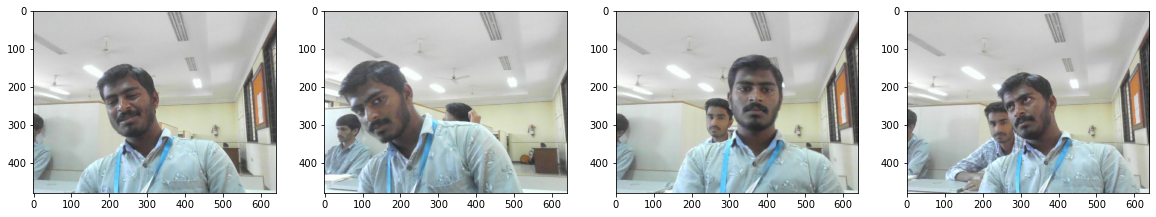

In [39]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [40]:
90*.7 # 63 to train


62.99999999999999

In [41]:
90*.15 # 14 and 13 to test and val


13.5

In [44]:
import os
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','lables', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'lables',filename)
            os.replace(existing_filepath, new_filepath)    

In [5]:
import albumentations as alb


In [8]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [47]:
img = cv2.imread(os.path.join('data','train', 'images','adc69d3e-d9b1-11ed-97af-d88083d593af.jpg'))


In [48]:
img

array([[[196, 191, 192],
        [196, 191, 192],
        [196, 191, 192],
        ...,
        [185, 184, 186],
        [185, 184, 186],
        [195, 194, 196]],

       [[195, 190, 191],
        [196, 191, 192],
        [197, 192, 193],
        ...,
        [180, 179, 181],
        [183, 182, 184],
        [190, 189, 191]],

       [[193, 191, 191],
        [194, 192, 192],
        [195, 193, 193],
        ...,
        [178, 177, 179],
        [187, 186, 188],
        [191, 190, 192]],

       ...,

       [[231, 222, 212],
        [229, 223, 210],
        [223, 221, 210],
        ...,
        [165, 165, 147],
        [165, 167, 148],
        [166, 168, 148]],

       [[238, 232, 219],
        [238, 235, 220],
        [236, 236, 222],
        ...,
        [167, 168, 148],
        [166, 170, 145],
        [165, 170, 143]],

       [[230, 227, 212],
        [231, 231, 215],
        [229, 232, 216],
        ...,
        [166, 167, 147],
        [164, 169, 142],
        [163, 168, 139]]

In [61]:
with open(os.path.join('data', 'train', 'lables', 'adc69d3e-d9b1-11ed-97af-d88083d593af.json'), 'r') as f:
    label = json.load(f)

In [62]:
label['shapes'][0]['points']

[[400.3188405797102, 125.57004830917876],
 [566.0193236714977, 349.24154589371983]]

In [63]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [64]:
coords

[400.3188405797102, 125.57004830917876, 566.0193236714977, 349.24154589371983]

In [65]:

coords = list(np.divide(coords, [640,480,640,480]))

In [66]:

coords

[0.6254981884057972,
 0.26160426731078906,
 0.8844051932367151,
 0.7275865539452496]

In [9]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])


In [68]:
augmented['bboxes'][0][2:]


(0.36595813204508854, 0.7249812130971551)

In [69]:
augmented['bboxes']


[(0.0, 0.22793344068706387, 0.36595813204508854, 0.7249812130971551)]

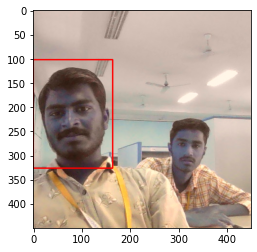

In [70]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [15]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'lables', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'lables', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.32960446859903386, 0.21430152979066022, 0.0, 0.7791666666666667, 'face'].
x_max is less than or equal to x_min for bbox [0.23147644927536234, 0.18410829307568438, 0.0, 0.8604166666666667, 'face'].
x_max is less than or equal to x_min for bbox [0.2775211352657005, 0.170018115942029, 0.0, 0.8416666666666667, 'face'].


In [16]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [17]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [18]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [ ]:
train_images.as_numpy_iterator().next()

In [19]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [21]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\lables\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [22]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\lables\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [23]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\lables\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [24]:
train_labels.as_numpy_iterator().next()


(array([1], dtype=uint8),
 array([0.3176, 0.3381, 0.6396, 0.72  ], dtype=float16))

In [25]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)


(3600, 3600, 840, 840, 780, 780)

In [26]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [27]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [28]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [29]:
train.as_numpy_iterator().next()[1]


(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.3071, 0.3992, 0.67  , 0.8564],
        [0.224 , 0.2615, 0.6094, 0.6533],
        [0.0817, 0.2668, 0.4038, 0.693 ],
        [0.    , 0.268 , 0.372 , 0.8447],
        [0.0687, 0.2289, 0.509 , 0.7065],
        [0.3044, 0.317 , 0.6265, 0.6655],
        [0.156 , 0.2086, 0.5093, 0.7163],
        [0.4307, 0.3096, 0.762 , 0.692 ]], dtype=float16))

In [30]:
data_samples = train.as_numpy_iterator()


In [32]:
from matplotlib import pyplot as plt

In [36]:
res = data_samples.next()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


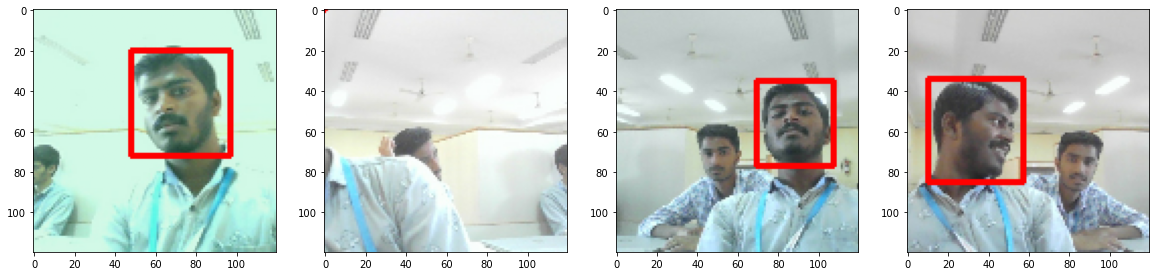

In [37]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [38]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [39]:
vgg = VGG16(include_top=False)


58889256/58889256 [==============================] - 5s 0us/step


In [40]:
vgg.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [41]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [42]:
facetracker = build_model()
facetracker.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [43]:
X, y = train.as_numpy_iterator().next()
X.shape


(8, 120, 120, 3)

In [44]:
classes, coords = facetracker.predict(X)
classes, coords


1/1 [==============================] - 1s 657ms/step


(array([[0.54109824],
        [0.56751096],
        [0.49616036],
        [0.6004824 ],
        [0.5871899 ],
        [0.5626487 ],
        [0.6961655 ],
        [0.5662455 ]], dtype=float32),
 array([[0.4803221 , 0.55284995, 0.51624674, 0.32660356],
        [0.4685561 , 0.5722027 , 0.47173446, 0.4394626 ],
        [0.54935783, 0.64715505, 0.498131  , 0.35058233],
        [0.48369345, 0.6238144 , 0.5218535 , 0.3449872 ],
        [0.4649332 , 0.57948136, 0.48314586, 0.37737718],
        [0.42021513, 0.6367847 , 0.48926303, 0.5100874 ],
        [0.4628566 , 0.67619044, 0.3903094 , 0.35076618],
        [0.41767046, 0.6421296 , 0.5005344 , 0.38530257]], dtype=float32))

In [45]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [46]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)


In [47]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [48]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [49]:
localization_loss(y[1], coords)
classloss(y[0], classes)
regressloss(y[1], coords)


<tf.Tensor: shape=(), dtype=float32, numpy=6.396539>

In [50]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [51]:
model = FaceTracker(facetracker)


In [52]:
model.compile(opt, classloss, regressloss)


In [53]:
logdir='logs'


In [54]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [58]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/5
450/450 [==============================] - 663s 1s/step - total_loss: 0.0218 - class_loss: 9.0308e-04 - regress_loss: 0.0213 - val_total_loss: 0.0130 - val_class_loss: 6.4373e-06 - val_regress_loss: 0.0130
Epoch 2/5
450/450 [==============================] - 651s 1s/step - total_loss: 0.0180 - class_loss: 0.0024 - regress_loss: 0.0168 - val_total_loss: 0.0884 - val_class_loss: 3.8892e-06 - val_regress_loss: 0.0884
Epoch 3/5
450/450 [==============================] - 651s 1s/step - total_loss: 0.0118 - class_loss: 0.0019 - regress_loss: 0.0109 - val_total_loss: 0.0609 - val_class_loss: 5.2303e-06 - val_regress_loss: 0.0609
Epoch 4/5
450/450 [==============================] - 667s 1s/step - total_loss: 0.0094 - class_loss: 0.0015 - regress_loss: 0.0086 - val_total_loss: 0.0554 - val_class_loss: 1.0744e-05 - val_regress_loss: 0.0554
Epoch 5/5
450/450 [==============================] - 645s 1s/step - total_loss: 0.0066 - class_loss: 1.4904e-04 - regress_loss: 0.0065 - val_total_l

In [59]:
hist.history
 

{'total_loss': [0.012593396939337254,
  0.021265104413032532,
  0.00752725824713707,
  0.006804336328059435,
  0.003929451573640108],
 'class_loss': [8.28047632239759e-05,
  6.822897557867691e-05,
  7.450624252669513e-06,
  5.5480188166256994e-05,
  3.2954601920209825e-05],
 'regress_loss': [0.012551994994282722,
  0.021230990067124367,
  0.007523532956838608,
  0.0067765964195132256,
  0.003912974148988724],
 'val_total_loss': [0.012986695393919945,
  0.08841452747583389,
  0.06092596426606178,
  0.055431462824344635,
  0.039614759385585785],
 'val_class_loss': [6.4373375607829075e-06,
  3.889211257046554e-06,
  5.230323949945159e-06,
  1.0743966413429007e-05,
  8.776863069215324e-06],
 'val_regress_loss': [0.012983476743102074,
  0.0884125828742981,
  0.06092334911227226,
  0.05542609095573425,
  0.0396103709936142]}

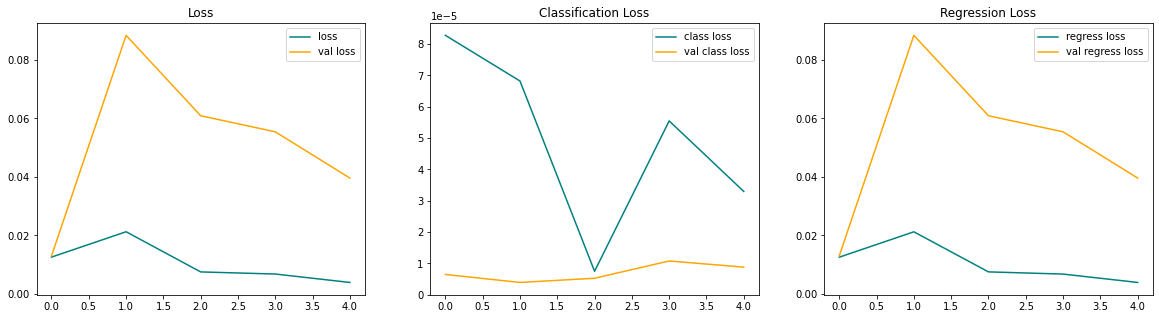

In [60]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [61]:
test_data = test.as_numpy_iterator()


In [68]:
test_sample = test_data.next()


In [69]:
yhat = facetracker.predict(test_sample[0])


1/1 [==============================] - 0s 275ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


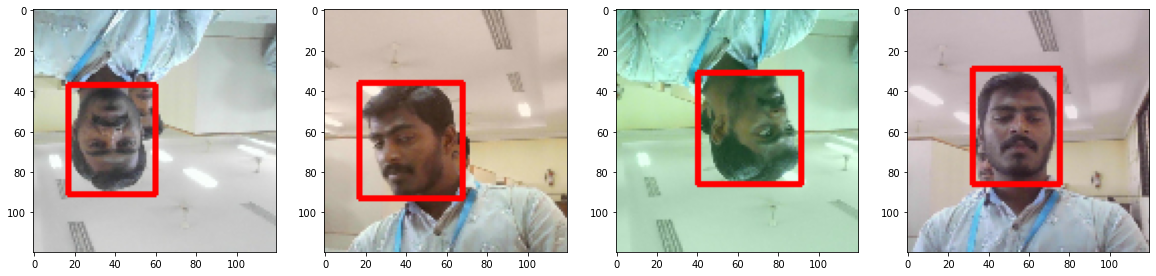

In [70]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [71]:
from tensorflow.keras.models import load_model


In [72]:
facetracker.save('facetracker.h5')


In [73]:
facetracker = load_model('facetracker.h5')


In [78]:
cap = cv2.VideoCapture(0) # 0 for inbuilt camera , 1 for external camera 
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'Shashank', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('FaceTracker', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()